# LAB: Naive Bayes

El objetivo de este lab es armar una clasificador que puede diferenciar comentarios negativos y positivos de películas (extraidos de [IMDB](http://www.imdb.com/) con la mayor efectividad posible. Observen cómo el dataset tiene (en principio) dos campos:

    + sentence: que contiene el texto del comentario acerca de la película
    + sentiment: la clasificación del comentario como positivo ($sentiment=1$) o negativo($sentiment=0)

#### Importamos el dataset

In [1]:
# Fuente: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences
import pandas as pd
df = pd.read_csv('../Data/imdb_labelled.txt', names=["sentence", 'sentiment'], sep='\t')
df.head()

,sentence,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


#### Vectorización de los features

Al igual que lo que hicimos en la práctica guiada, vamos a implementar un enfoque usado en análisis de texto, conocido como "bag of words". La idea es que se pueden extrear features (predictores) de un cuerpo de texto basado en las palabras que lo conforman. Pero es necesario transformar y procesar las palabras en el texto para poder hacerlas inteligibles para un clasificador.

El enfoque que utilizamos en la práctica guiada fue calcular el tf-idf para que las palabras muy frecuentes en todo el corpus redujeran su importancia.

Otra posibilidad para deshacernos de términos que no aportan información es utilizar lo que se conoce como "stop words". Las "stop words" son listados de palabras que se construyen manualmente con los términos más frecuentes de cada idioma que no contienen información específica sobre la temática de la cual habla el texto.
Scikit learn tiene un listado de stopwords en inglés. Si queremos clasificar texto en español o en otros idiomas, existen paquetes de python que nos pueden ayudar a construir la lista de stopwords, como por ejemplo: https://pypi.python.org/pypi/stop-words


A diferencia de lo que hicimos en la práctica guiada, para realizar la vectorización vamos a usar un método de `sklearn` llamado [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) 

**Hint:** pueden revisar [este ejemplo de uso y análisis de texto](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) en `sklearn`.

In [2]:
# Separación entre train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['sentence'], df['sentiment'], test_size=0.33, random_state=42)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
modelo_cvec = CountVectorizer(stop_words='english')

In [4]:
X_train = modelo_cvec.fit_transform(X_train)

In [5]:
X_train.shape

(501, 2051)

#### Implementación, predicción y evaluación del modelo

A continuación, les pedimos que implementen un clasificador de tipo Naive Bayes, que evalúen su performance sobre datos no observados y que construyan una matriz de confusión para evaluar específicamente en qué clase el modelo comete mayor cantidad de errores de predicción.

In [6]:
from sklearn.naive_bayes import MultinomialNB
modelo_NB = MultinomialNB()
modelo_NB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [7]:
# Predicción
X_test = modelo_cvec.transform(X_test)
labels_predichas = modelo_NB.predict(X_test)

In [8]:
labels_predichas

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Primero calculamos el accuracy general del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels_predichas)

0.7368421052631579

In [11]:
# Ahora calculamos la matriz de confusión
mat = confusion_matrix(y_test, labels_predichas)
mat.shape

(2, 2)

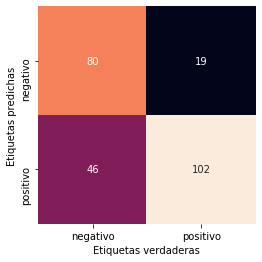

In [12]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['negativo','positivo'], yticklabels=['negativo','positivo'])
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas');